In [51]:
from scipy.misc import face
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

In [52]:
img = face(gray=True)
smoothed_image = gaussian_filter(img, sigma=3)

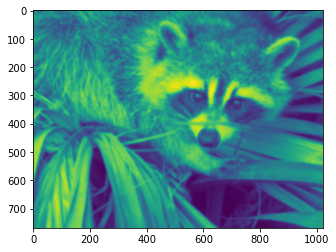

In [53]:
plt.imshow(smoothed_image)

In [54]:
pdf = img / img.sum()
rows, cols = img.shape
n = rows * cols
pdfFlat = pdf.reshape(-1)

In [55]:
import numpy as np
cdfFlat = pdfFlat.copy()

In [56]:
for i in range(1, n):
    cdfFlat[i] += cdfFlat[i-1]

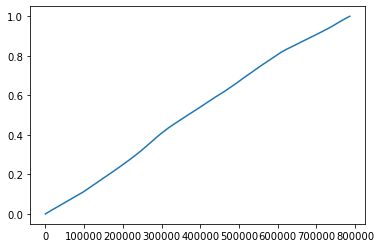

In [57]:
plt.plot(np.arange(len(cdfFlat)), cdfFlat)

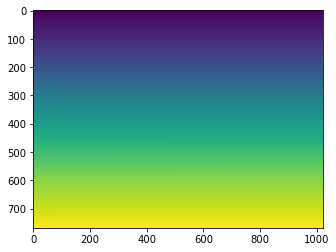

In [58]:
plt.imshow(cdfFlat.reshape(rows, cols))

In [78]:
M = 50000
u = np.random.uniform(size=M)
S = np.searchsorted(cdfFlat, u)

In [79]:
S, S.shape, S.max()

(array([216056, 197351,  38664, ..., 334212, 244362, 589720]),
 (50000,),
 786408)

In [80]:
sampleMap = np.zeros(n)

In [81]:
sampleMap[S] = pdfFlat[S]

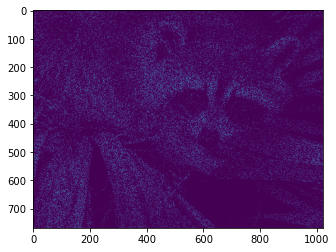

In [82]:
plt.imshow(sampleMap.reshape(rows, cols))

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
pdfFlat.shape

(786432,)

In [146]:
pdfFlat[S].shape

(50000,)

In [131]:
X = np.array(list(pdfFlat[S]/pdfFlat.max()) + list(u))
Y = [1] * len(u) + [0] * len(u)

In [140]:
pdfFlat[S]/ pdfFlat.max()

array([0.544, 0.332, 0.296, ..., 0.66 , 0.656, 0.544])

In [143]:
X

array([0.544     , 0.332     , 0.296     , ..., 0.45672913, 0.31536964,
       0.79275269])

In [132]:
model = RandomForestRegressor(n_estimators=20, max_depth=10)

In [133]:
model.fit(X.reshape(-1,1), Y)

RandomForestRegressor(max_depth=10, n_estimators=20)

In [134]:
predict = model.predict((pdfFlat/pdfFlat.max()).reshape(-1, 1))

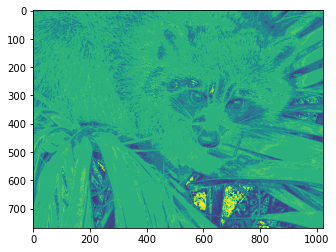

In [135]:
plt.imshow(predict.reshape(rows, cols))

In [137]:
predict.min()

0.0

In [122]:
predict

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
Y = 

In [66]:
X

array([740428.94874077,  42441.04871568, 605269.81279749, ...,
        53397.06106398, 283895.38178916, 397339.53684786])

In [19]:
u

array([0.42452748, 0.46982974, 0.95188142, ..., 0.11967085, 0.99647684,
       0.76674758])

In [ ]:
model = RandomForestRegressor()

In [238]:
X = np.arange(-10,10,0.1)
Y = X**3

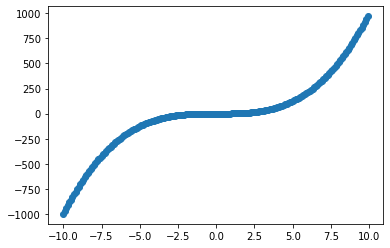

In [239]:
plt.scatter(X, Y)

In [240]:
indexes = np.random.choice(len(X), int(len(X) * 0.8))

In [241]:
from sklearn.linear_model import LinearRegression

In [197]:
model = LinearRegression()

In [198]:
model.fit(X[indexes].reshape(-1,1), Y[indexes])

LinearRegression()

In [202]:
results = model.predict(X.reshape(-1,1))

In [205]:
model.coef_

array([60.45681123])

In [206]:
model.intercept_

-7.257627853335226

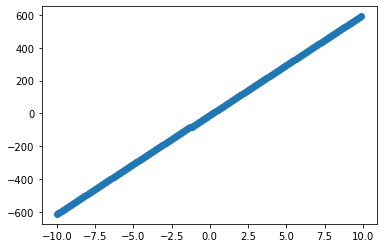

In [207]:
plt.scatter(X, results)

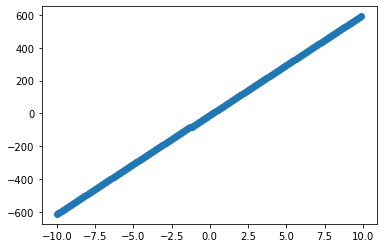

In [208]:
plt.scatter(X, X*model.coef_ + model.intercept_)

In [242]:
X = X.reshape(-1, 1)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
X_3 = poly.fit_transform(X)

In [243]:
X_3

array([[ 1.00000000e+00, -1.00000000e+01,  1.00000000e+02,
        -1.00000000e+03],
       [ 1.00000000e+00, -9.90000000e+00,  9.80100000e+01,
        -9.70299000e+02],
       [ 1.00000000e+00, -9.80000000e+00,  9.60400000e+01,
        -9.41192000e+02],
       [ 1.00000000e+00, -9.70000000e+00,  9.40900000e+01,
        -9.12673000e+02],
       [ 1.00000000e+00, -9.60000000e+00,  9.21600000e+01,
        -8.84736000e+02],
       [ 1.00000000e+00, -9.50000000e+00,  9.02500000e+01,
        -8.57375000e+02],
       [ 1.00000000e+00, -9.40000000e+00,  8.83600000e+01,
        -8.30584000e+02],
       [ 1.00000000e+00, -9.30000000e+00,  8.64900000e+01,
        -8.04357000e+02],
       [ 1.00000000e+00, -9.20000000e+00,  8.46400000e+01,
        -7.78688000e+02],
       [ 1.00000000e+00, -9.10000000e+00,  8.28100000e+01,
        -7.53571000e+02],
       [ 1.00000000e+00, -9.00000000e+00,  8.10000000e+01,
        -7.29000000e+02],
       [ 1.00000000e+00, -8.90000000e+00,  7.92100000e+01,
      

In [244]:
model.fit(X_3[indexes], Y[indexes])

LinearRegression()

In [245]:
model.coef_

array([ 0.00000000e+00, -3.00870440e-14,  2.22044605e-16,  1.00000000e+00])

In [234]:
set(np.arange(len(X))) - set(indexes)

{0,
 5,
 7,
 8,
 12,
 14,
 15,
 16,
 19,
 20,
 22,
 24,
 26,
 27,
 28,
 34,
 37,
 38,
 39,
 40,
 41,
 44,
 45,
 46,
 49,
 54,
 55,
 57,
 60,
 61,
 62,
 65,
 68,
 69,
 72,
 76,
 77,
 78,
 79,
 81,
 86,
 93,
 94,
 97,
 100,
 103,
 106,
 107,
 109,
 112,
 115,
 116,
 117,
 118,
 120,
 121,
 123,
 124,
 130,
 132,
 135,
 136,
 137,
 139,
 140,
 141,
 142,
 143,
 145,
 146,
 147,
 148,
 149,
 152,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 171,
 172,
 173,
 176,
 177,
 178,
 179,
 182,
 185,
 187,
 188,
 189,
 190,
 193,
 198,
 199}

In [236]:
results = model.predict(X_3[list(set(np.arange(len(X))) - set(indexes))])

In [229]:
results

array([-8.91881364e+02, -1.01663224e+03, -1.03741561e+03, -9.84871861e+02,
       -8.89641365e+02, -7.82364497e+02, -6.93681633e+02, -6.54233148e+02,
       -6.94659418e+02, -8.45600818e+02, -1.13769772e+03, -1.60159051e+03,
       -2.26791955e+03, -3.16732523e+03, -4.33044791e+03, -5.78792797e+03,
       -7.57040580e+03, -9.70852175e+03, -1.22329162e+04, -1.51742296e+04,
       -1.85631022e+04, -2.24301744e+04, -2.68060867e+04, -3.17214793e+04,
       -3.72069927e+04, -4.32932673e+04, -5.00109433e+04, -5.73906613e+04,
       -6.54630615e+04, -7.42587843e+04, -8.38084702e+04, -9.41427594e+04,
       -1.05292292e+05, -1.17287710e+05, -1.30159651e+05, -1.43938758e+05,
       -1.58655670e+05, -1.74341027e+05, -1.91025471e+05, -2.08739641e+05,
       -2.27514177e+05, -2.47379721e+05, -2.68366912e+05, -2.90506392e+05,
       -3.13828799e+05, -3.38364775e+05, -3.64144960e+05, -3.91199995e+05,
       -4.19560519e+05, -4.49257174e+05, -4.80320599e+05, -5.12781435e+05,
       -5.46670322e+05, -

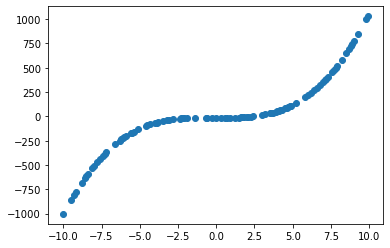

In [237]:
plt.scatter(X[list(set(np.arange(len(X))) - set(indexes))], results)